In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
dataset = pd.read_csv("Coursework_1_data.csv") # Import the data

In [3]:
dataset.describe()                             # Observe some statistics about the features 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df = dataset.iloc[:,:-1] # All variables except the target value
num_variables = df.columns[:10].tolist() # numerical features
cat_variables = df.columns[10:].tolist() # categorical features

# Target Value Analysis

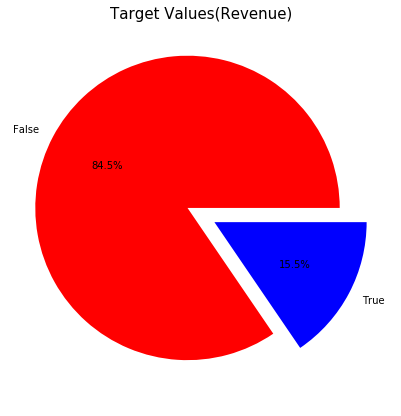

False    10422
True      1908
Name: Revenue, dtype: int64


In [5]:
plt.figure(figsize = (7,7)) # Pie chart for the target analysis
explode = (0.1, 0.1)
plt.pie(x = dataset["Revenue"].value_counts().values , labels = dataset["Revenue"].value_counts().index\
        , colors = ["Red","blue"] , autopct = "%1.1f%%", explode=explode)
plt.title("Target Values(Revenue)" , color = "Black" , fontsize = 15)

plt.show()
print(dataset["Revenue"].value_counts())

### As we see above, the majority of the data given incluede 10422(84.5%) False values, while the number of True values inclueded are 1908(15.5%)
### So the imbalance ratio = 1908 / 10422 ~= 0.1830

# Numerical Variable Analysis

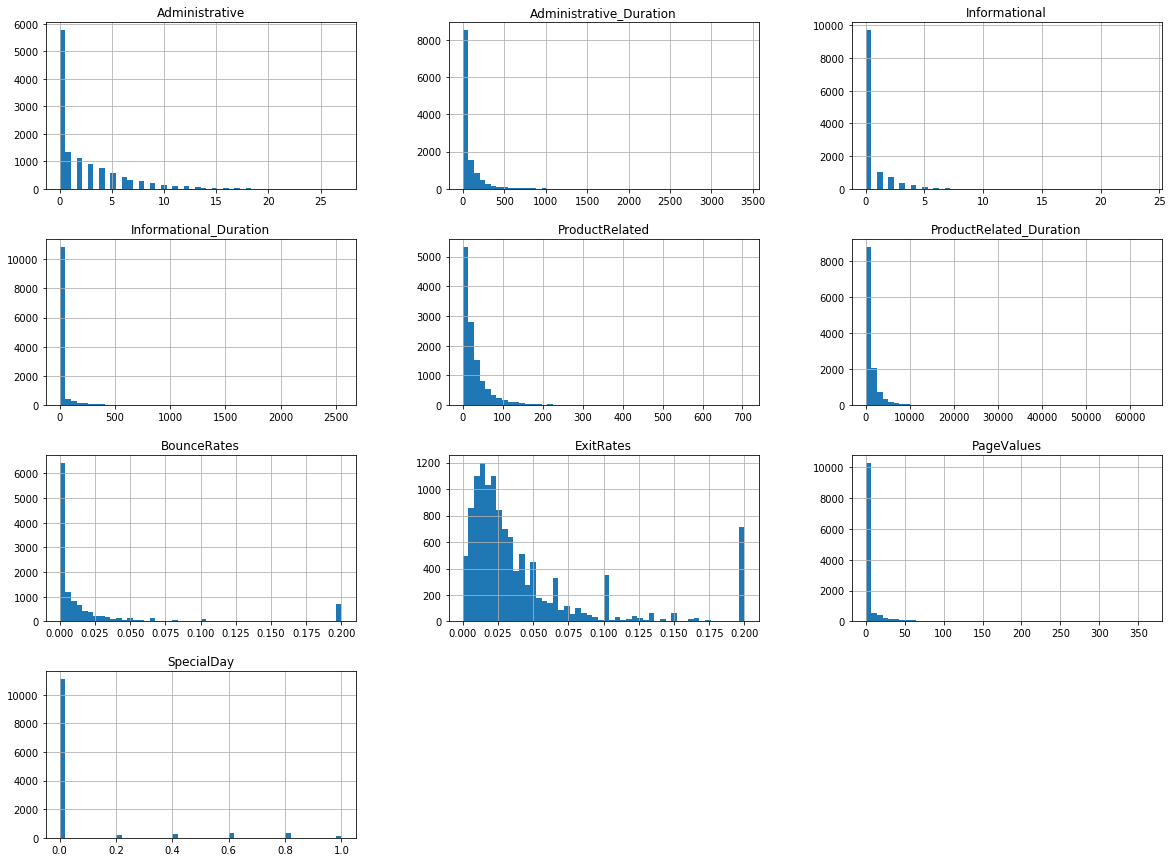

In [6]:
%matplotlib inline                                   
df[num_variables].hist(bins=50, figsize=(20,15))      # Look at the histogram shapes of the numerical datas (Especially important for the k-nearest neighbors)        
plt.show()

### Discrete Attributes: Administrative, Administrative_Duration, BounceRates, ExitRates, Product related, Special Day (Assuming there are finite or countably infinite set of values as I understood from the data and given instructions)
### Continuous Attributes: Informational duration,  Product related duration, Bounce rate,Exit Rate, Page value 
### Bounce rate and Exit Rate are ratio scaled

# Categorical Variable Analysis with the Target Value Together

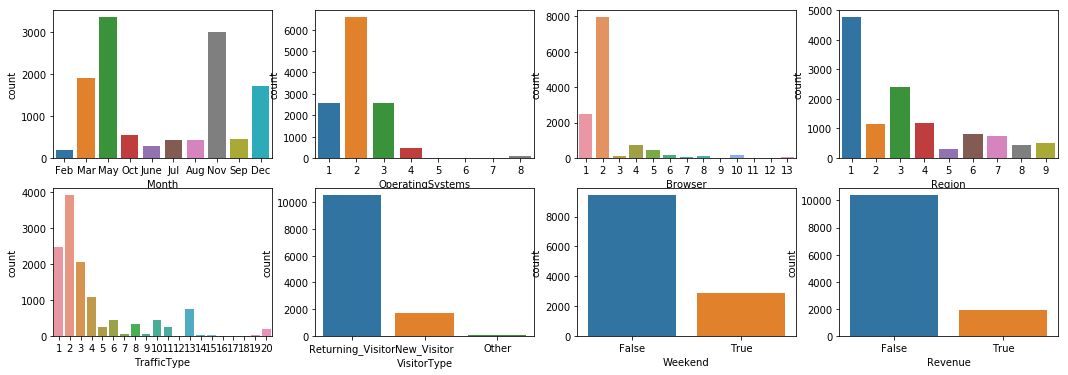

In [7]:
f, axes = plt.subplots(2, 4 , figsize = (18,6))   # Compare categorical features with the target data with subplots
sns.countplot(df["Month"], ax = axes[0,0])
sns.countplot(df["OperatingSystems"], ax= axes[0,1])
sns.countplot(df["Browser"], ax =axes[0,2])
sns.countplot(df["Region"],ax = axes[0,3])
sns.countplot(df["TrafficType"], ax = axes[1,0])
sns.countplot(df["VisitorType"], ax = axes[1,1])
sns.countplot(df["Weekend"], ax = axes[1,2])
sns.countplot(dataset["Revenue"], ax = axes[1,3])
plt.show()

### In the figures above, the catogorial variables with the target value are drawn. It seems like some of the categorical features spread very similar to the target value revenue. 

### Nominal: OperatingSystems, Browser, Region, TrafficType, VisitorType, Month (Some of the nominal variables can be ordinal too but since we do not have more information, I made assumptions)
### Binary: Weekend

### Target value is also Binary

# Data Preprocessing

In [8]:
dataset.isna().sum()         # To observe whether there is missing data or not

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### As we can see, there is no missing value in the data

In [9]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [10]:
#pip install feature_engine

# Outlier Capping

In [11]:
from feature_engine.outliers import Winsorizer           # Feature engine to cap the outliers located in the maximum range

windsoriser = Winsorizer(capping_method = 'gaussian',
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=num_variables)

windsoriser.fit(X[num_variables])

Winsorizer(tail='both',
           variables=['Administrative', 'Administrative_Duration',
                      'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])

In [12]:
X[num_variables] = windsoriser.transform(X[num_variables])

I did outlier capping operation via using feature_engine. It increased the model performance slightly when I compared the models without it. It proves the cap the outliers so that they will not exceed minimum or maximum values calculated. 

# StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler         # Perform standard scaler to have mean = 0 and variance = 1
                                                         # It may increase the performance and increase the model training time 
scaler = StandardScaler()
X[num_variables] = scaler.fit_transform(X[num_variables])

I used standard scaler to integrate my numerical variables to normal distribution. So that it will be faster to implement machine learning models and it may give better results 

# Yeo Johnson Transformation

In [14]:
from sklearn.preprocessing import PowerTransformer     # Variable transformation

power = PowerTransformer(method='yeo-johnson', standardize=True)
X[num_variables] = power.fit_transform(X[num_variables])

I also used yeo-johnson transformation to adjust the numerical variable shapes to normal distribution(It increases the effect of normal distribution) and so that they will be able to give better results. Especially k-nearest neighbors algorithm is greatly affected by the shape of the data. 

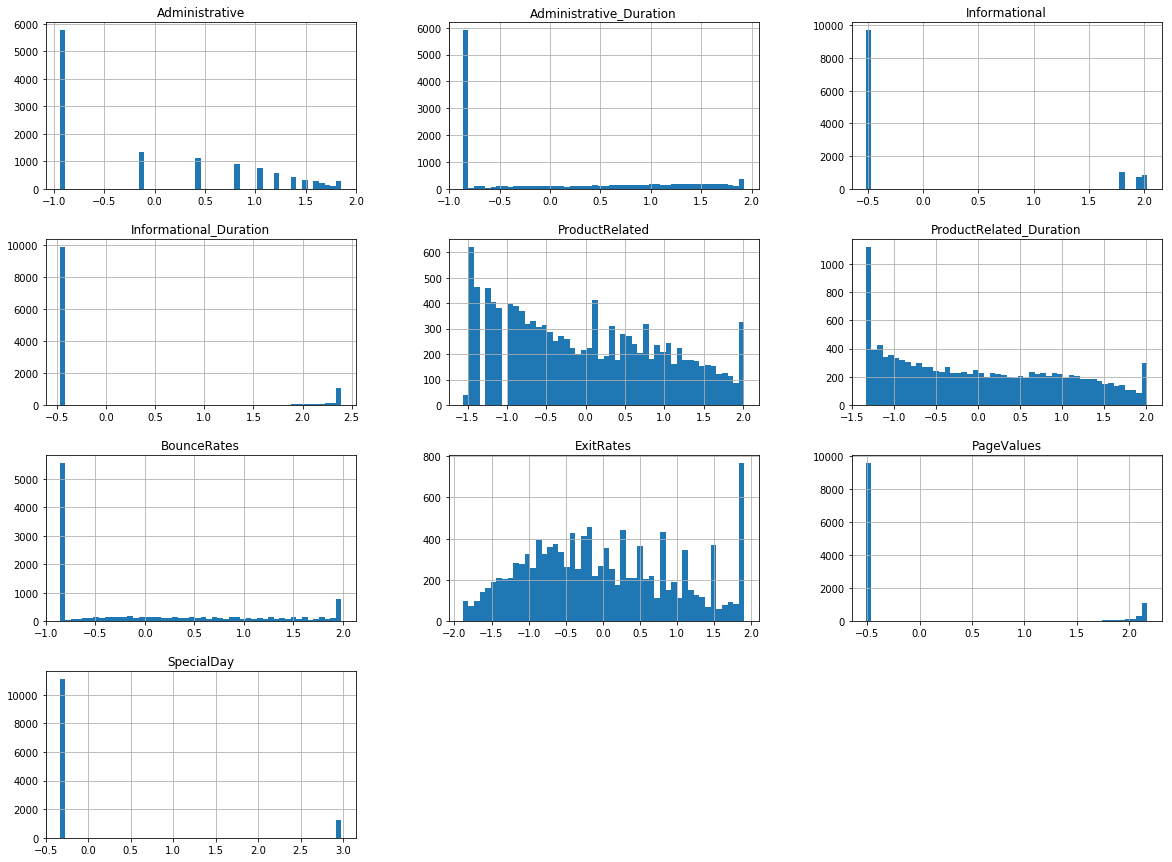

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
X[num_variables].hist(bins=50, figsize=(20,15))
plt.show()

When we compare the histograms with the previous ones implemented earlier, some of the features have better shapes so the algorithms may work better 

In [16]:
from sklearn.model_selection import train_test_split     # Split the model to perform feature selection

X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X, y, test_size=0.2, random_state=38)

Before training the models, I wanted to perform feature selection. I am going to use laben and ordinal encoders to apply feature selection.

# Label and Ordinal Encoder to Perform Feature Selection

In [17]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder   # To use feature selection, I perform label and ordinal encoding

oe = OrdinalEncoder()    # Ordinal encoding
oe.fit(X_train_feature[["Month","VisitorType","Weekend"]])
X_train_feature[["Month","VisitorType","Weekend"]] = oe.transform(X_train_feature[["Month","VisitorType","Weekend"]])
X_test_feature[["Month","VisitorType","Weekend"]]= oe.transform(X_test_feature[["Month","VisitorType","Weekend"]])
df_corrolation = dataset
oe.fit(df_corrolation[["Month","VisitorType","Weekend"]])
df_corrolation[["Month","VisitorType","Weekend"]] = oe.transform(df_corrolation[["Month","VisitorType","Weekend"]])
    
 
le = LabelEncoder()       # Label encoding
le.fit(y_train_feature)
y_train_feature = le.transform(y_train_feature)
y_test_feature = le.transform(y_test_feature)

import warnings
warnings.simplefilter(action='ignore')
  

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

First I integrated some of the categorical variables to perform feature selection

# Feature Selection Anova for Numerical Features

In [18]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif

def select_features_anova(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return fs.scores_

Anova is used to see the effect of numerical features on categorical data(target variable) in statistics

In [19]:
X_train_feature[num_variables].columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [20]:
select_features_anova(X_train_feature[num_variables],y_train_feature,X_test_feature[num_variables])

array([ 273.81951303,  233.08048821,  120.3563646 ,  114.7800909 ,
        420.48847037,  501.84343321,  315.21049867,  674.71745976,
       6046.811788  ,   78.08139723])

I will not drop none of the features since it looks like all the data has relationship with the target value

# Feature Selection Chi for Categorical Features

In [21]:
from sklearn.feature_selection import chi2

def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return fs.scores_

In [22]:
X_train_feature[cat_variables].columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')

In [23]:
select_features_chi(X_train_feature[cat_variables], y_train_feature, X_test_feature[cat_variables])

array([75.53915032,  0.45926478, 11.32727983,  5.54081283,  0.93885329,
       28.80886883,  8.78982889])

It looks like all of the categorical features have reasonable chi values and since there are not much features I will not drop any feature.

In some models, one-hot encoder gives better results as I observed from my previous machine learning projects so I am going to make my models via using one-hot encoder. ( I only used label and ordinal encoder to apply feature selection methods)

# Corrolation Heat Map

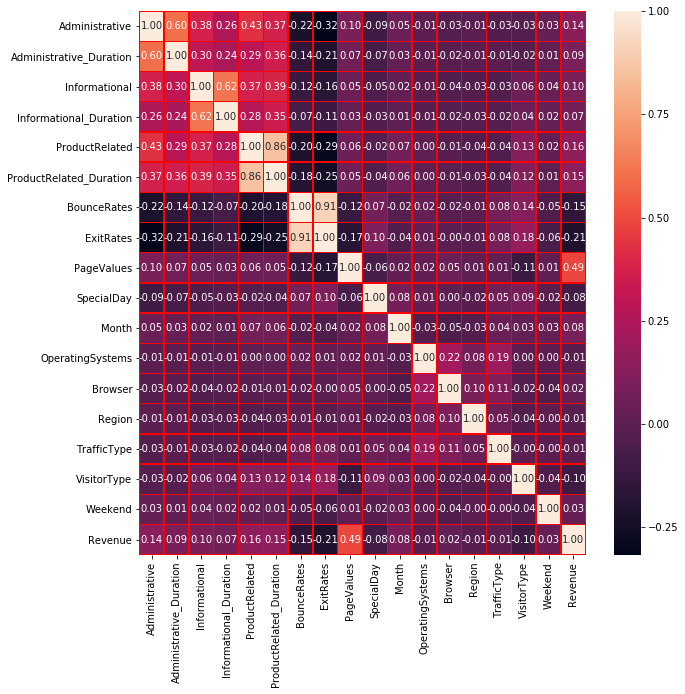

In [24]:
f,ax = plt.subplots(figsize = (10,10)) # HeatMap to see the corrolation of features
sns.heatmap(df_corrolation.corr() , annot=True , linewidths = 0.5 , linecolor = "red" , fmt = ".2f", ax = ax )
plt.show()

We can see 2 significant feature pairs with high positive correlation coefficient. There are not many columns in the data so I will not drop anything.

# One-Hot Encoder

In [186]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), cat_variables),
    remainder = 'passthrough')
X = column_trans.fit_transform(X)

# Split the Model

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

Split the model again to be used in the models with one-hot encoder

# Ranfom Forest Algorithm with Undersampling

I just make some assumptions about which model will be suitable with which sampling method. I mean I could have done it differently for example I could have used Random forest with oversampling as well. I just wanted to implement many techniques to learn more about them

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    NearMiss,
)

Write the all undersampling methods that will be used in the random forest.

In [189]:
undersampler_dict = {

    'random': RandomUnderSampler(        # Undersample the majority label without replacement
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'tomek': TomekLinks(                # Remove the tomek linked data to perform undersampling
        sampling_strategy='auto',
        n_jobs=4),

    'oss': OneSidedSelection(           # Perform 1 nearest neighbors by iterating to determine to remove or not
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'enn': EditedNearestNeighbours(     # Clean the majority label which are located in the selection boundary
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'renn': RepeatedEditedNearestNeighbours(     # Repeat a few times of editednearestneighbors
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        max_iter=100),

    'nm1': NearMiss(                     # Randomly eliminates from the majority class by looking at the class distribution
        sampling_strategy='auto',
        version=1,
        n_neighbors=3,
        n_jobs=4),

}

I am going to perform 6 undersampling techniques and compare their results for randomforest classification

In [190]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    results_dict = {}
    shapes_dict = {}

    rf = RandomForestClassifier(
        n_estimators=100, random_state=38, max_depth=3, n_jobs=4)

    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train) # Predict_proba will give the only probability of being False and True
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
   
 
    
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    print("----------------------------------------------------------------")

    return roc_auc_score(y_test, pred[:, 1])

In [191]:
# to save the results in the dictionaries
results_dict = {}
shapes_dict = {}


# To perform undersampling with each iteration and compare the roc-auc values for train and test sets

for undersampler in undersampler_dict.keys():
        
    print(undersampler)
        
    # Data resampling process
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
    # evaluate the performance
    roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
    
     # dictionaries to store the results with the full_data (orginal data)
    results_dict['full_data'] = roc
    shapes_dict['full_data'] = len(X_train)
        
    # dictionaries to store the results with undersampled data
    results_dict[undersampler] = roc
    shapes_dict[undersampler] = len(X_resampled)

random
Train set
Random Forests roc-auc: 0.9077837140553613
Test set
Random Forests roc-auc: 0.9060691486094694
----------------------------------------------------------------
tomek
Train set
Random Forests roc-auc: 0.9159748710987198
Test set
Random Forests roc-auc: 0.9162635734511255
----------------------------------------------------------------
oss
Train set
Random Forests roc-auc: 0.9186070548864561
Test set
Random Forests roc-auc: 0.9176423841391645
----------------------------------------------------------------
enn
Train set
Random Forests roc-auc: 0.946540823798518
Test set
Random Forests roc-auc: 0.9034776112480869
----------------------------------------------------------------
renn
Train set
Random Forests roc-auc: 0.9570804325510961
Test set
Random Forests roc-auc: 0.8996432640710764
----------------------------------------------------------------
nm1
Train set
Random Forests roc-auc: 0.8538951894651976
Test set
Random Forests roc-auc: 0.8886134052988948
----------------

### In here I made an assumption and compared the performances of the undersampling with only roc-auc 

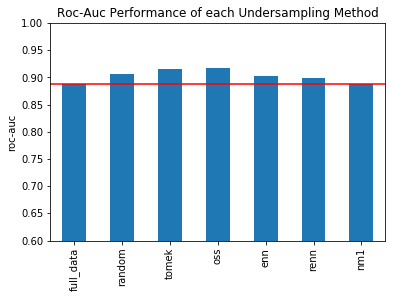

In [192]:
pd.Series(results_dict).plot.bar()   # To compare the roc-auc values of each undersampling method on random forest
plt.ylabel('roc-auc')
plt.title("Roc-Auc Performance of each Undersampling Method")
plt.ylim(0.6, 1)
plt.axhline(results_dict['full_data'], color='r')
plt.show()

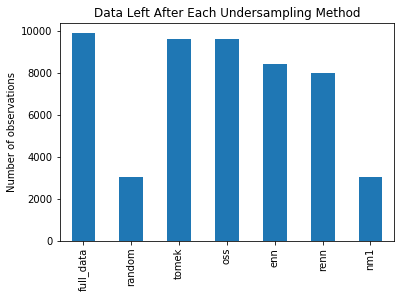

In [193]:
pd.Series(shapes_dict).plot.bar()                      # To compare how the number of datas in original data and after each under sampling method
plt.title("Data Left After Each Undersampling Method")
plt.ylabel('Number of observations')
plt.show()

# OSS Undersampling

Since OneSidedSelection undersampling method gives the best area under curve score for the randomforest model, compared to other undersampling methods, I selected it to evaluate some statistics 

In [194]:
undersample = OneSidedSelection(              # OneSidedSelection implementation
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4)
# Undersample X_train and y_train             # Fit the data
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [195]:
rf = RandomForestClassifier(                                   # Train randomforestclassifier with undersampled data
n_estimators=300, random_state=38, max_depth=100, n_jobs=4)
rf.fit(X_resampled, y_resampled)


RandomForestClassifier(max_depth=100, n_estimators=300, n_jobs=4,
                       random_state=38)

# Hyperparameter Tuning to Increase roc_auc Score of the Undersampled Random Forest

In [196]:
import sklearn

sklearn.metrics.SCORERS.keys() # To learn which scoring measures can be put to the grid search scoring parameter

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [197]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score 

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,200,300],
    'n_estimators': [100,200,300]
}

cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) # I will use same cv for k-nearest neighbors and logistic regression classifiers

Define the parameters to be tuned via grid search. I also used stratifiedKFold to preserve the percentage of samples for each class.

In [198]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = cv, n_jobs = -1, verbose = 2,scoring="f1")

I made a grid_search to optimize the roc-auc

In [199]:
grid_search.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   46.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_depth=100, n_estimators=300,
                                              n_jobs=4, random_state=38),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100, 200, 300],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [200]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 300}

In [201]:
grid_search.best_score_

0.6682216317881473

# Fit the Model with Best Params 

In [202]:
rf = RandomForestClassifier(
n_estimators=300, random_state=27, max_depth=100, bootstrap=True, n_jobs=4)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=100, n_estimators=300, n_jobs=4,
                       random_state=27)

In [203]:
y_pred = rf.predict_proba(X_test) # Predict_proba will give the probabilities of label 1 and label 0
print(roc_auc_score(y_test, y_pred[:, 1]))

0.9333194616621687


# Roc-Auc Curve

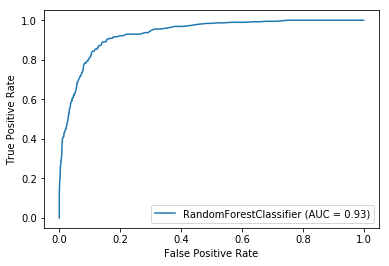

In [204]:
from sklearn.metrics import plot_roc_curve           

rf_disp = plot_roc_curve(rf, X_test, y_test)

# Precision Recall Curve

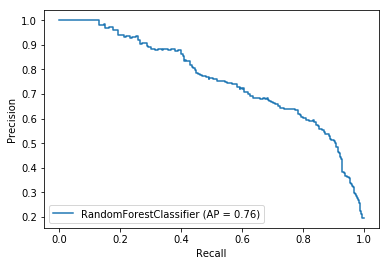

In [205]:
from sklearn.metrics import plot_precision_recall_curve

rf_curve = plot_precision_recall_curve(rf, X_test, y_test)

# Probability Calibration of Random Forest

In [206]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, y_pred[:,1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(10, 10)

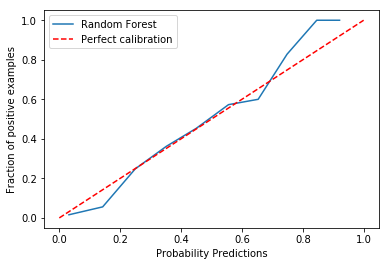

In [207]:
# plot calibration curve
plt.plot(mean_predicted_value, fraction_of_positives, label='Random Forest')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

# add labels and legends
plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

# F1 Score Recall and Precision for Different Probability Thresholds

I also tried some different threshold values to determine best f1 score in my own but I wrote some of them here since it would have taken a lot of space.

In [208]:
from sklearn.metrics import f1_score, recall_score, precision_score

threshold = 0.2

while(threshold<0.40):
    predicted_proba = rf.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print("Threshold Probability:" , threshold)
    print("f1_score:" ,f1_score(y_test,predicted))
    print("recall:", recall_score(y_test,predicted))
    print("precision_score", precision_score(y_test,predicted))
    print("------------------------------------")
    threshold+=0.005

Threshold Probability: 0.2
f1_score: 0.6576663452266153
recall: 0.8903394255874674
precision_score 0.5214067278287462
------------------------------------
Threshold Probability: 0.20500000000000002
f1_score: 0.6653658536585366
recall: 0.8903394255874674
precision_score 0.5311526479750779
------------------------------------
Threshold Probability: 0.21000000000000002
f1_score: 0.6686390532544378
recall: 0.8851174934725848
precision_score 0.5372424722662441
------------------------------------
Threshold Probability: 0.21500000000000002
f1_score: 0.6693069306930692
recall: 0.8825065274151436
precision_score 0.5390749601275917
------------------------------------
Threshold Probability: 0.22000000000000003
f1_score: 0.6673326673326674
recall: 0.8720626631853786
precision_score 0.540453074433657
------------------------------------
Threshold Probability: 0.22500000000000003
f1_score: 0.6720321931589538
recall: 0.8720626631853786
precision_score 0.546644844517185
-----------------------------

# Threshold = 0.34 Confusion Matrix

In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score

threshold = 0.340000000000001

predicted_proba = rf.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')


cm = confusion_matrix(y_test, predicted)
print(cm)
print(accuracy_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(precision_score(y_test, predicted))
print(f1_score(y_test,predicted))

[[1913  170]
 [  85  298]]
0.8965936739659367
0.7780678851174935
0.6367521367521367
0.7003525264394829


# K-Nearest Neighbors Algorithm with OverSampling

Write the all oversampling methods that will be used in the k-nearest neighbors.

In [210]:
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)

from sklearn.svm import SVC

oversampler_dict = {

    'random': RandomOverSampler(                        # Over sample the lesser label to pick samples by with replacement
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(                                     # Synthetic over sampling method 
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=10,
        n_jobs=4),

    'adasyn': ADASYN(                                   # Generates samples via estimation of local distribution 
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(                        # Focus on the samples in borders to be sampled
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

}


In [211]:
# function to train K-Nearest Neighbors and evaluate the performance

def run_kneighbors(X_train, X_test, y_train, y_test):
    
    results_dict_2 = {}
    shapes_dict_2 = {}

    kneighbors = KNeighborsClassifier(n_neighbors=23)
    kneighbors.fit(X_train, y_train)

    print('Train set')
    pred_2 = kneighbors.predict_proba(X_train) # Predict_proba will give the only probability of being False and True
    print(
        'K-Nearest Neighbors roc-auc: {}'.format(roc_auc_score(y_train, pred_2[:, 1])))
    
    print('Test set')
    pred_2 = kneighbors.predict_proba(X_test)
    print(
        'K-Nearest Neighbors roc-auc: {}'.format(roc_auc_score(y_test, pred_2[:, 1])))
    print("----------------------------------------------------------------")

    return roc_auc_score(y_test, pred_2[:, 1])

In [212]:
from sklearn.neighbors import KNeighborsClassifier

# dictionaries to save the results
results_dict_2 = {}
shapes_dict_2 = {}


for oversampler in oversampler_dict.keys():
        
    print(oversampler)
        
    # resample the data
    X_resampled_2, y_resampled_2 = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
    # evaluate performance 
    roc = run_kneighbors(X_resampled_2, X_test, y_resampled_2, y_test)
    
     # Orginal data performance
    results_dict_2['full_data'] = roc
    shapes_dict_2['full_data'] = len(X_train)
        
    # Oversampled results
    results_dict_2[oversampler] = roc
    shapes_dict_2[oversampler] = len(X_resampled_2)

random
Train set
K-Nearest Neighbors roc-auc: 0.9462017105499811
Test set
K-Nearest Neighbors roc-auc: 0.9120444127457259
----------------------------------------------------------------
smote
Train set
K-Nearest Neighbors roc-auc: 0.967024524294819
Test set
K-Nearest Neighbors roc-auc: 0.9169905827230007
----------------------------------------------------------------
adasyn
Train set
K-Nearest Neighbors roc-auc: 0.9672998402145679
Test set
K-Nearest Neighbors roc-auc: 0.9039489138105439
----------------------------------------------------------------
border1
Train set
K-Nearest Neighbors roc-auc: 0.9719919582876473
Test set
K-Nearest Neighbors roc-auc: 0.9030282443102123
----------------------------------------------------------------


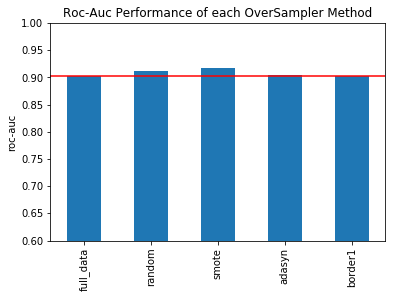

In [213]:
pd.Series(results_dict_2).plot.bar()                         #Roc-Auc Comparison of each oversampling method
plt.ylabel('roc-auc')
plt.title("Roc-Auc Performance of each OverSampler Method")
plt.ylim(0.6, 1)
plt.axhline(results_dict_2['full_data'], color='r')
plt.show()

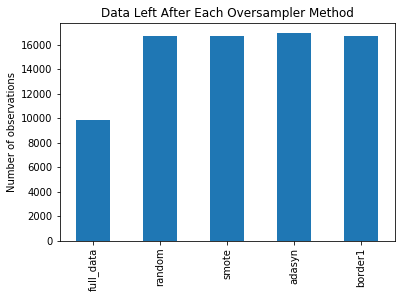

In [214]:
pd.Series(shapes_dict_2).plot.bar()                      # Number of original data and data after oversampling
plt.title("Data Left After Each Oversampler Method")
plt.ylabel('Number of observations')
plt.show()

# K-nearest Neighbors with Smote

I picked smote as the oversampler since it has the best roc-auc results compared the other oversamplers

In [215]:
oversample = SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors = 10,
        n_jobs = 4)
# OverSample X_train and y_train
X_resampled_2, y_resampled_2 = oversample.fit_resample(X_train, y_train)

In [216]:
kneighbors = KNeighborsClassifier(n_neighbors=23)
kneighbors.fit(X_resampled_2, y_resampled_2)

KNeighborsClassifier(n_neighbors=23)

In [217]:
y_pred_2 = kneighbors.predict_proba(X_test) # Predict_proba will give the probabilities of label 1 and label 0
print(roc_auc_score(y_test, y_pred_2[:, 1]))


0.9169905827230007


In [218]:
param_grid_2 = [
    {'n_neighbors' : [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    } ]

In [219]:
grid_search_2 = GridSearchCV(estimator = kneighbors, param_grid = param_grid_2, 
                          cv = cv, n_jobs = -1, verbose = 2,scoring="roc_auc")

In [220]:
grid_search_2.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=23), n_jobs=-1,
             param_grid=[{'n_neighbors': [11, 12, 13, 14, 15, 16, 17, 18, 19,
                                          20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30]}],
             scoring='roc_auc', verbose=2)

In [221]:
grid_search_2.best_params_

{'n_neighbors': 29}

# Fit the Model With Best Param

In [222]:
kneighbors = KNeighborsClassifier(n_neighbors=29)
kneighbors.fit(X_resampled_2, y_resampled_2)

KNeighborsClassifier(n_neighbors=29)

In [223]:
y_pred_2 = kneighbors.predict_proba(X_test) # Predict_proba will give the probabilities of label 1 and label 0
print(roc_auc_score(y_test, y_pred_2[:, 1]))


0.9190587987550592


# Roc-Auc Curve

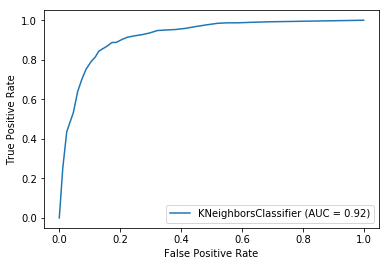

In [224]:
from sklearn.metrics import plot_roc_curve

kneighbors_disp = plot_roc_curve(kneighbors, X_test, y_test)

# Precision Recall Curve

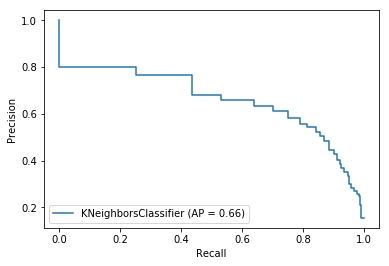

In [225]:
from sklearn.metrics import plot_precision_recall_curve

kneighbors_curve = plot_precision_recall_curve(kneighbors, X_test, y_test)

# Probability Calibration Curve

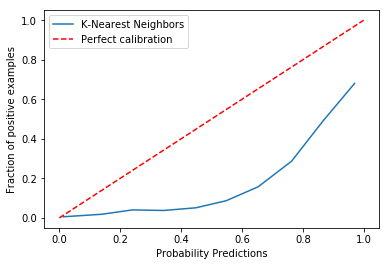

In [226]:
from sklearn.calibration import calibration_curve

fraction_of_positives_2, mean_predicted_value_2 = calibration_curve(
    y_test, y_pred_2[:,1], n_bins=10, strategy='uniform')

len(mean_predicted_value_2), len(fraction_of_positives_2)


# plot calibration curve
plt.plot(mean_predicted_value_2, fraction_of_positives_2, label='K-Nearest Neighbors')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

# add labels and legends
plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

### Since we used an oversampling method, the calibration curve gave bad results. Thus we need to do a recalibration operation to fix it

# Isotonic Re-Calibration

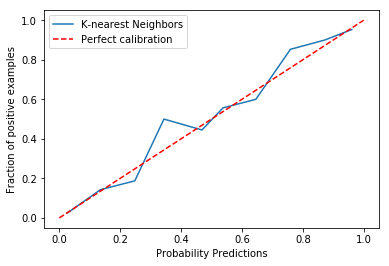

In [227]:
# calibration
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Logistic Regression with cost sensitive learning
k_isotonic = CalibratedClassifierCV(kneighbors, cv=5, method='isotonic')
k_isotonic.fit(X_test, y_test)
kprob_isotonic = k_isotonic.predict_proba(X_test)[:, 1]

fraction_of_positives_k, mean_predicted_value_k = calibration_curve(
    y_test, kprob_isotonic, n_bins=10, strategy='uniform')


# plot calibration curve
plt.plot(mean_predicted_value_k, fraction_of_positives_k, label='K-nearest Neighbors')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

# add labels and legends
plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

In [230]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score

threshold = 0.6

while(threshold<0.9):
    predicted_proba = kneighbors.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    print("Threshold Probability:" , threshold)
    print("f1_score:" ,f1_score(y_test,predicted))
    print("recall:", recall_score(y_test,predicted))
    print("precision_score", precision_score(y_test,predicted))
    print("------------------------------------")
    threshold+=0.02

Threshold Probability: 0.6
f1_score: 0.6273062730627307
recall: 0.8877284595300261
precision_score 0.48502139800285304
------------------------------------
Threshold Probability: 0.62
f1_score: 0.6273062730627307
recall: 0.8877284595300261
precision_score 0.48502139800285304
------------------------------------
Threshold Probability: 0.64
f1_score: 0.6379310344827587
recall: 0.8694516971279374
precision_score 0.5037821482602118
------------------------------------
Threshold Probability: 0.66
f1_score: 0.6495049504950494
recall: 0.856396866840731
precision_score 0.5231259968102073
------------------------------------
Threshold Probability: 0.68
f1_score: 0.6495049504950494
recall: 0.856396866840731
precision_score 0.5231259968102073
------------------------------------
Threshold Probability: 0.7000000000000001
f1_score: 0.6618852459016393
recall: 0.8433420365535248
precision_score 0.5446880269814502
------------------------------------
Threshold Probability: 0.7200000000000001
f1_score:

In [231]:
threshold = 0.76

predicted_proba_2 = kneighbors.predict_proba(X_test)
predicted_2 = (predicted_proba_2[:,1] >= threshold).astype('int')


cm = confusion_matrix(y_test, predicted_2)
print(cm)
print(accuracy_score(y_test, predicted_2))
print(recall_score(y_test, predicted_2))
print(precision_score(y_test, predicted_2))
print(f1_score(y_test,predicted_2))

[[1865  218]
 [  80  303]]
0.8791565287915653
0.7911227154046997
0.581573896353167
0.6703539823008849


If we want more precision or more recall we can change our threshold probability according to our cost of missclassifying the true or false label.  

# Logistic Regression with Cost-Sensitive Learning

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Logistic Regression with class_weight

# Define the class_weight inside the model

def run_Logit(X_train, X_test, y_train, y_test, class_weight):
    
    # weights introduced here
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
        class_weight=class_weight # weights / cost
    )
    
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [233]:
# Use imbalanced(orginal) data set to evalute the performance of logistic regression

run_Logit(X_train,X_test,y_train,y_test,
          class_weight=None)

Train set
Logistic Regression roc-auc: 0.9175716709358948
Test set
Logistic Regression roc-auc: 0.9228768508966657


In [234]:
# evaluate performance of algorithm built
# cost estimated as imbalance ratio

# 'balanced' indicates that we want same amount of 
# each observation, thus, imbalance ratio

run_Logit(X_train, X_test, y_train, y_test,
          class_weight='balanced')

Train set
Logistic Regression roc-auc: 0.9211141014274228
Test set
Logistic Regression roc-auc: 0.9243108140122264


In [235]:
# different cost 1:10

run_Logit(X_train, X_test,y_train,y_test,
          class_weight={1:1, 1:10})

Train set
Logistic Regression roc-auc: 0.9207801383583754
Test set
Logistic Regression roc-auc: 0.9232579040322693


# Hyperparameter Tuning for Logistic Regression

In [236]:
logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
        class_weight='balanced' # weights / cost
    )
    
logit.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10, n_jobs=4,
                   random_state=0, solver='newton-cg')

In [237]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
     'max_iter': [8,9,10,11,12,13,14,15,16,17,18],
    'C' : np.logspace(-4, 4, 20)
    } ]

In [238]:
from sklearn.model_selection import GridSearchCV
grid_search_3 = GridSearchCV(logit, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = 'roc_auc')

In [239]:
grid_search_3.fit(X_train, y_train)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', max_iter=10,
                                          n_jobs=4, random_state=0,
                                          solver='newton-cg'),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                       18],
                          'penalty': ['l1', 'l2']}],
             scoring='roc_auc', verbose=True)

In [240]:
grid_search_3.best_params_

{'C': 0.08858667904100823, 'max_iter': 9, 'penalty': 'l2'}

# Logistic Regression Classification with Best Params

In [241]:
logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=9,
        C = 0.08858667904100823,
        n_jobs=4,
        class_weight='balanced' # weights / cost
    )
    
logit.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, class_weight='balanced', max_iter=9,
                   n_jobs=4, random_state=0, solver='newton-cg')

In [242]:
y_pred_3 = logit.predict_proba(X_test) # Predict_proba will give the probabilities of label 1 and label 0
print(roc_auc_score(y_test, y_pred_3[:, 1]))

0.9246768255766875


# Roc-Auc Curve

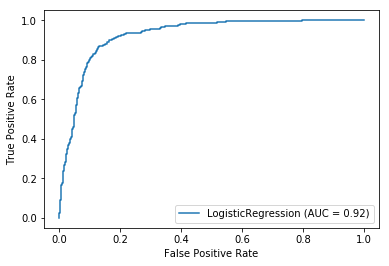

In [243]:
logisticregression_disp = plot_roc_curve(logit, X_test, y_test)

# Precision Recall Curve

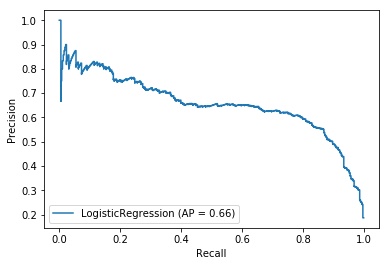

In [244]:
logisticregression_curve = plot_precision_recall_curve(logit, X_test, y_test)

# Probability Calibration

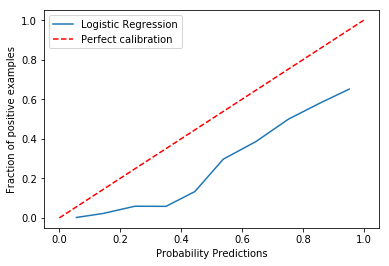

In [245]:
from sklearn.calibration import calibration_curve

fraction_of_positives_3, mean_predicted_value_3 = calibration_curve(
    y_test, y_pred_3[:,1], n_bins=10, strategy='uniform')


# plot calibration curve
plt.plot(mean_predicted_value_3, fraction_of_positives_3, label='Logistic Regression')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

# add labels and legends
plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

### We obtained a bad probability calibrated logistic regression. Normally logistic regression usually gives well calibrated curve but since we used cost sensitive learning, it distorted the probability. So we need to make re-calibration

# Isotonic Re-Calibration

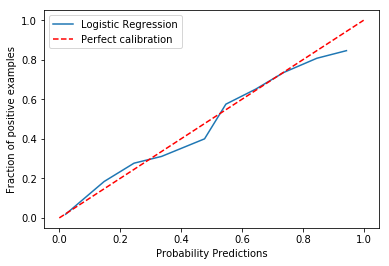

In [246]:
# calibration
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Logistic Regression with cost sensitive learning
clf_isotonic = CalibratedClassifierCV(logit, cv=5, method='isotonic')
clf_isotonic.fit(X_test, y_test)
prob_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

fraction_of_positives_4, mean_predicted_value_4 = calibration_curve(
    y_test, prob_isotonic, n_bins=10, strategy='uniform')


# plot calibration curve
plt.plot(mean_predicted_value_4, fraction_of_positives_4, label='Logistic Regression')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

# add labels and legends
plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

# F1 Score Recall and Precision for Different Probability Thresholds in Logistic Regression

In [247]:
from sklearn.metrics import f1_score

threshold = 0.4

while(threshold<0.7):
    predicted_proba_3 = logit.predict_proba(X_test)
    predicted_3 = (predicted_proba_3 [:,1] >= threshold).astype('int')
    print("Threshold Probability:" , threshold)
    print("f1_score:" ,f1_score(y_test,predicted_3))
    print("recall:", recall_score(y_test,predicted_3))
    print("precision_score", precision_score(y_test,predicted_3))
    print("------------------------------------")
    threshold+=0.01

Threshold Probability: 0.4
f1_score: 0.6310063463281959
recall: 0.9086161879895561
precision_score 0.48333333333333334
------------------------------------
Threshold Probability: 0.41000000000000003
f1_score: 0.6359447004608294
recall: 0.9007832898172323
precision_score 0.49145299145299143
------------------------------------
Threshold Probability: 0.42000000000000004
f1_score: 0.641192917054986
recall: 0.8981723237597912
precision_score 0.4985507246376812
------------------------------------
Threshold Probability: 0.43000000000000005
f1_score: 0.6428571428571428
recall: 0.8929503916449086
precision_score 0.5022026431718062
------------------------------------
Threshold Probability: 0.44000000000000006
f1_score: 0.6469465648854962
recall: 0.8851174934725848
precision_score 0.5097744360902255
------------------------------------
Threshold Probability: 0.45000000000000007
f1_score: 0.6511627906976744
recall: 0.8772845953002611
precision_score 0.5177195685670262
--------------------------

# Performance Evaluation with probability threshold = 0.63

In [248]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score

threshold = 0.66

predicted_proba_3 = logit.predict_proba(X_test)
predicted_3 = (predicted_proba_3[:,1] >= threshold).astype('int')


cm = confusion_matrix(y_test, predicted_3)
print(cm)
print(accuracy_score(y_test, predicted_3))
print(recall_score(y_test, predicted_3))
print(precision_score(y_test, predicted_3))
print(f1_score(y_test,predicted_3))

[[1887  196]
 [  80  303]]
0.8880778588807786
0.7911227154046997
0.6072144288577155
0.6870748299319729


# Evaluation of all 3 Models

# Roc-Auc for 3 Models Combined

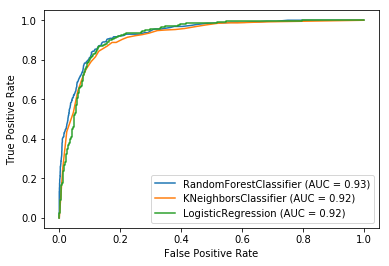

In [249]:
ax = plt.gca()

rf_disp.plot(ax=ax , alpha = 1)
kneighbors_disp.plot(ax=ax, alpha = 1)
logisticregression_disp.plot(ax=ax, alpha=1)
plt.show()

It seems like random forest classifier has the most AUC with little difference

# Precision Recall Curve for 3 Models Combined

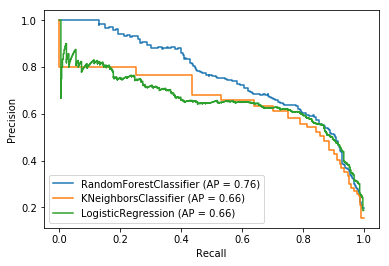

In [250]:
ax = plt.gca()

rf_curve.plot(ax=ax, alpha = 1)
kneighbors_curve.plot(ax=ax,alpha=1)
logisticregression_curve.plot(ax=ax,alpha=1)
plt.show()

When it comes to the precision recall curve, RandomForestClassifier has the most succesful result

# Best f1 Score for Different Threshold Probabilities 3 Models Combined

In [299]:
# 0.7003525264394829 ---> RandomForest --> threshold 0.34
# 0.6744730679156907 ---> K-nearest Neighbors --> threshold 0.80
# 0.6870748299319729 ---> Logistic Regression --> threshold 0.66

data = {'Classifier_Type': ["RandomForest", 'K_nearest_Neighbors', 'Logistic_Regression'],'f1_scores': [0.7003525264394829,\
      0.6744730679156907, 0.6870748299319729], 'Threshold Probability': [0.34,0.80,0.66]
                                                                               
         }

f1_scores = pd.DataFrame(data=data)
f1_scores

,Classifier_Type,f1_scores,Threshold Probability
0,RandomForest,0.700353,0.34
1,K_nearest_Neighbors,0.674473,0.80
2,Logistic_Regression,0.687075,0.66


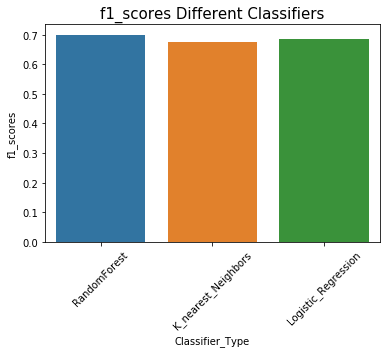

In [298]:
plt.figure(figsize=(6,4))
sns.barplot(x = f1_scores['Classifier_Type'], y =f1_scores["f1_scores"])
plt.xticks(rotation= 45)
plt.title('f1_scores Different Classifiers' , fontsize = 15)

plt.show()

# Probability Calibration Curves for 3 Models Combined

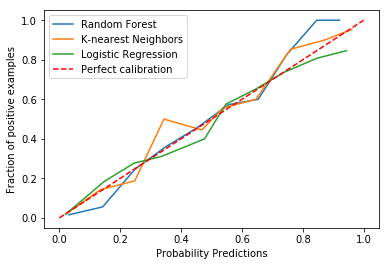

In [251]:
ax = plt.gca()

# calibration curve of rf
plt.plot(mean_predicted_value, fraction_of_positives, label='Random Forest')

# calibration curve of K-nearest Neighbors
plt.plot(mean_predicted_value_k, fraction_of_positives_k, label='K-nearest Neighbors')

# calibration curve of Logistic Regression
plt.plot(mean_predicted_value_4, fraction_of_positives_4, label='Logistic Regression')

# plot perfect calibration line
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10),
         linestyle='--', color='red', label='Perfect calibration')

plt.xlabel('Probability Predictions')
plt.ylabel('Fraction of positive examples')
plt.legend(loc='upper left')
plt.show()

plt.show()

Logistic regression has the most succesful performance in probablity calibration with little difference

# Voting Classifier of the 3 Models with Undersampled Data

I combined my 3 models to use voting classifier because I was curious about the performance of some ensemble learning methods

In [252]:
from sklearn.ensemble import VotingClassifier

voting_1 = VotingClassifier(
    estimators=[('kn', kneighbors), ('rf', rf), ('logistic', logit)],
    voting='soft')
voting_1.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('kn', KNeighborsClassifier(n_neighbors=29)),
                             ('rf',
                              RandomForestClassifier(max_depth=100,
                                                     n_estimators=300, n_jobs=4,
                                                     random_state=27)),
                             ('logistic',
                              LogisticRegression(C=0.08858667904100823,
                                                 class_weight='balanced',
                                                 max_iter=9, n_jobs=4,
                                                 random_state=0,
                                                 solver='newton-cg'))],
                 voting='soft')

In [253]:
prediction_voting_1 = voting_1.predict(X_test)

In [254]:
cm = confusion_matrix(y_test, prediction_voting_1)
print(cm)
print(accuracy_score(y_test, prediction_voting_1))
print(recall_score(y_test, prediction_voting_1))
print(precision_score(y_test, prediction_voting_1))
print(f1_score(y_test,prediction_voting_1))

[[1906  177]
 [  95  288]]
0.8896999188969992
0.7519582245430809
0.6193548387096774
0.6792452830188679


# Roc-Auc

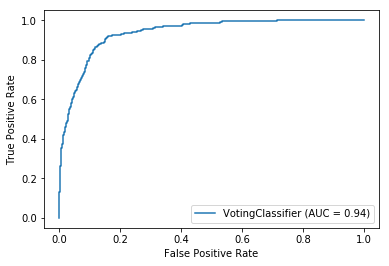

In [255]:
voting_undersampled = plot_roc_curve(voting_1, X_test, y_test)

By using VotingClassifier we slightly increased the AUC when we compare it with each model

# Precision Recall Curve

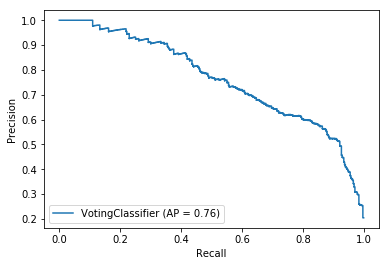

In [256]:
voting_undersampled_curve_1 = plot_precision_recall_curve(voting_1, X_test, y_test)

Precision Recall Curve area is same with the RandomForestClassifier and more than logisticregression and k-nearest neighbors

# VotingClassifier of the 3 Models with Oversampled Data

In [257]:
from sklearn.ensemble import VotingClassifier

voting_2 = VotingClassifier(
    estimators=[('lr', kneighbors), ('rf', rf), ('logistic', logit)],
    voting='soft')
voting_2.fit(X_resampled_2, y_resampled_2)

VotingClassifier(estimators=[('lr', KNeighborsClassifier(n_neighbors=29)),
                             ('rf',
                              RandomForestClassifier(max_depth=100,
                                                     n_estimators=300, n_jobs=4,
                                                     random_state=27)),
                             ('logistic',
                              LogisticRegression(C=0.08858667904100823,
                                                 class_weight='balanced',
                                                 max_iter=9, n_jobs=4,
                                                 random_state=0,
                                                 solver='newton-cg'))],
                 voting='soft')

In [258]:
prediction_voting_2 = voting_2.predict(X_test)

In [259]:
cm = confusion_matrix(y_test, prediction_voting_2)
print(cm)
print(accuracy_score(y_test, prediction_voting_2))
print(recall_score(y_test, prediction_voting_2))
print(precision_score(y_test, prediction_voting_2))
print(f1_score(y_test,prediction_voting_2))

[[1829  254]
 [  52  331]]
0.8759124087591241
0.8642297650130548
0.5658119658119658
0.6838842975206612


In [260]:
prediction_voting_2_probability = voting_2.predict_proba(X_test)

# Roc-Auc

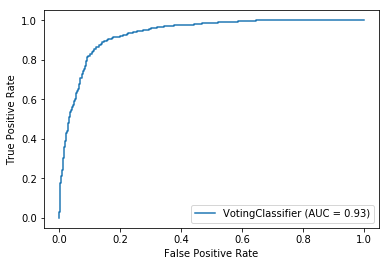

In [261]:
voting_oversampled = plot_roc_curve(voting_2, X_test, y_test)

# Precision Recall Curve

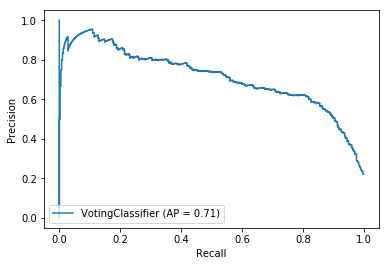

In [262]:
from sklearn.metrics import plot_precision_recall_curve

voting_2_oversampled_curve = plot_precision_recall_curve(voting_2, X_test, y_test)

# Adaboost with Oversampling

In [263]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada.fit(X_resampled_2, y_resampled_2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [264]:
prediction_ada = ada.predict_proba(X_test)

# Roc-Auc

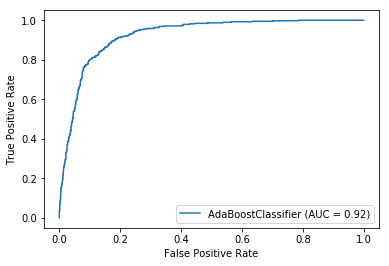

In [265]:
ada_disp = plot_roc_curve(ada, X_test, y_test)

# Precision vs Recall

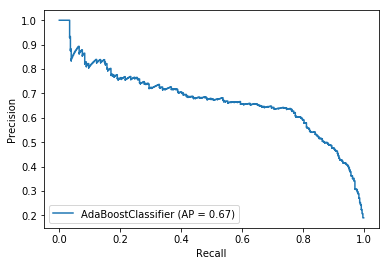

In [266]:
from sklearn.metrics import plot_precision_recall_curve

ada_oversampled_curve = plot_precision_recall_curve(ada, X_test, y_test)

In [267]:
from sklearn.ensemble import AdaBoostClassifier      
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada.fit(X_resampled, y_resampled)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

# Voting_Oversampled, Voting_Undersampled and Adaboost Together

# Roc-Auc

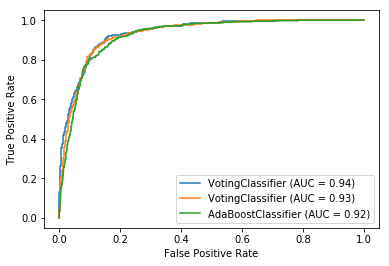

In [268]:
ax = plt.gca()

voting_undersampled.plot(ax=ax , alpha = 1)
voting_oversampled.plot(ax=ax, alpha = 1)
ada_disp.plot(ax=ax, alpha=1)
plt.show()

# Precision Recall

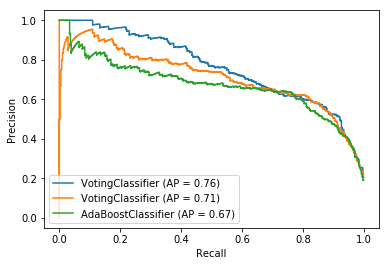

In [269]:
ax = plt.gca()

voting_undersampled_curve_1.plot(ax=ax,alpha=1)
voting_2_oversampled_curve.plot(ax=ax,alpha=1)
ada_oversampled_curve.plot(ax=ax,alpha=1)
plt.show()